# Dependencies

- Numpy
- Pandas
- Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to plot in notebook
%matplotlib inline 

# Task 1

- Generate normal distribution, of a village population age, with mean ($\mu$) 15.6 and variance ($\sigma^2$) 1
- Sample 1000 points
- Plot the normal distribution probability density

In [2]:
mu1, sigma1 = 15.6, 1
s1 = np.random.RandomState(20).normal(mu1, sigma1, 1000)

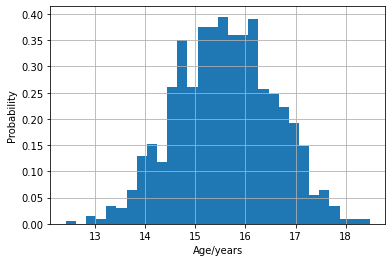

In [3]:
plt.hist(s1, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.grid()
plt.xlabel('Age/years');

# Task 2

- Generate normal distribution, of a village population age, with mean ($\mu$) 17.5 and variance ($\sigma^2$) 1
- Sample 1000 points
- Plot the normal distribution

In [4]:
mu2, sigma2 = 18.5, 1
s2 = np.random.RandomState(20).normal(mu2, sigma2, 1000)

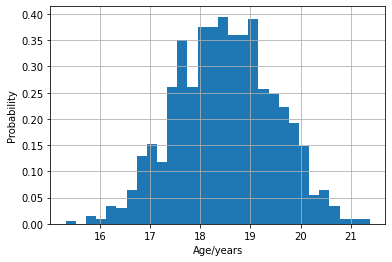

In [5]:
plt.hist(s2, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.grid()
plt.xlabel('Age/years');

# Task 3

- Plot both distributions on the same figure

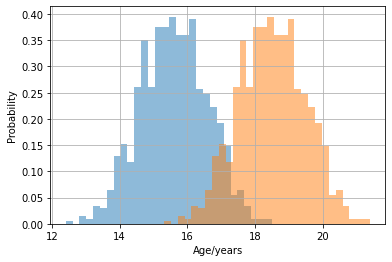

In [6]:
plt.hist(s1, density=True, bins=30, alpha=0.5)  # `density=False` would make counts
plt.hist(s2, density=True, bins=30, alpha=0.5)  # `density=False` would make counts
plt.ylabel('Probability')
plt.grid()
plt.xlabel('Age/years');

# Task 4

- 17 years old is the age of an individuals to be a candidate for the two villages' combined mayor elections
- Based on their age individuals will vote negative or positive, at each village it is assumed that everyone votes for the negative or positive party, respectively
- Plot the threshold of 17 on the same figure as the normal distributions
- Add a legend

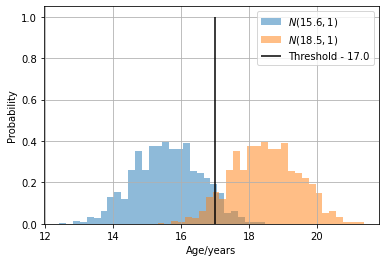

In [7]:
plt.hist(s1, density=True, bins=30, alpha=0.5, label='$N(15.6,1)$')  # `density=False` would make counts
plt.hist(s2, density=True, bins=30, alpha=0.5, label='$N(18.5,1)$')  # `density=False` would make counts
plt.vlines(x=17,ymax=1,ymin=0, label='Threshold - 17.0')
plt.ylabel('Probability')
plt.legend()
plt.grid()

plt.xlabel('Age/years');

# Task 5

- Compute using the Threshold = 17.0
    - True positives (TP)
    - True negatives (TN)
    - False positives (FP)
    - False negatives (FN)
- Assuming 
    - $N(15.6,1)$ sample is a negative
    - $N(18.5,1)$ sample is a positive

In [8]:
s1_T = (s1 > 17.0)*1 #boolean to integer
s2_T = (s2 > 17.0)*1

#tp,tn,fp,fn
TP = np.sum(s2_T == 1)
TN = np.sum(s1_T == 0)
FP = np.sum(s1_T == 1)
FN = np.sum(s2_T == 0)

In [9]:
print('TP: ', TP)
print('TN: ', TN)
print('FP: ', FP)
print('FN: ', FN)

TP:  930
TN:  919
FP:  81
FN:  70


# Task 6

- Which party won the election

In [10]:
P, N = TP+FP, TN+FN
print('+ve Party votes', TP+FP)
print('-ve Party votes', TN+FN)
print('\n')

if P>N:
    print('+ve party won!')
elif P==N:
    print('its a draw, round 2 of votind!')
else:
    print('-ve party won!')

+ve Party votes 1011
-ve Party votes 989


+ve party won!


# Task 7

- Plot the threshold of 17 on the same figure as the normal distributions
- Add a legend
- Add a different color on the plot for each sample:
     - TP
     - TN
     - FP
     - FN
- Add legend for each color

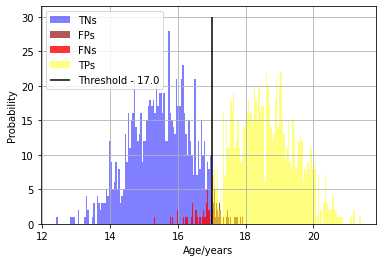

In [11]:
plt.hist(s1[s1 < 17.0], density=False, bins=100, alpha=0.5, label='TNs', color='blue')
plt.hist(s1[s1 > 17.0], density=False, bins=100, alpha=0.8, label='FPs', color='brown')
plt.hist(s2[s2 < 17.0], density=False, bins=100, alpha=0.8, label='FNs', color='red')
plt.hist(s2[s2 > 17.0], density=False, bins=100, alpha=0.5, label='TPs', color='yellow')
plt.vlines(x=17,ymax=30,ymin=0, label='Threshold - 17.0')
plt.ylabel('Probability')
plt.legend()
plt.grid()

plt.xlabel('Age/years');

# Task 8

- Compute **5** of the following the following evaluation metrics:

<tbody><tr style="vertical-align:top;">
<td>
<dl><dt>condition positive (P)</dt>
<dd>the number of real positive cases in the data</dd>
<dt>condition negative (N)</dt>
<dd>the number of real negative cases in the data</dd></dl>
<hr>
<dl><dt>true positive (TP)</dt>
<dd>eqv. with hit</dd>
<dt>true negative (TN)</dt>
<dd>eqv. with correct rejection</dd>
<dt>false positive (FP)</dt>
<dd>eqv. with <a href="/wiki/False_alarm" title="False alarm">false alarm</a>, <a href="/wiki/Type_I_error" class="mw-redirect" title="Type I error">Type I error</a></dd>
<dt>false negative (FN)</dt>
<dd>eqv. with miss, <a href="/wiki/Type_II_error" class="mw-redirect" title="Type II error">Type II error</a></dd></dl>
<hr>
<dl><dt><a href="/wiki/Sensitivity_(test)" class="mw-redirect" title="Sensitivity (test)">sensitivity</a>, <a href="/wiki/Precision_and_recall#Recall" title="Precision and recall">recall</a>, <a href="/wiki/Hit_rate" title="Hit rate">hit rate</a>, or <a href="/wiki/Sensitivity_(test)" class="mw-redirect" title="Sensitivity (test)">true positive rate</a> (TPR)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">T</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">T</mi>
              <mi mathvariant="normal">P</mi>
            </mrow>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">P</mi>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">T</mi>
              <mi mathvariant="normal">P</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mn>1</mn>
        <mo>−<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">N</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f02ea353bf60bfdd9557d2c98fe18c34cd8db835" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:37.537ex; height:5.343ex;" alt="{\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }"></span></dd>
<dt><a href="/wiki/Specificity_(tests)" class="mw-redirect" title="Specificity (tests)">specificity</a>, <a href="/wiki/Specificity_(tests)" class="mw-redirect" title="Specificity (tests)">selectivity</a> or <a href="/wiki/Specificity_(tests)" class="mw-redirect" title="Specificity (tests)">true negative rate</a> (TNR)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">T</mi>
          <mi mathvariant="normal">N</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">T</mi>
              <mi mathvariant="normal">N</mi>
            </mrow>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">N</mi>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">T</mi>
              <mi mathvariant="normal">N</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mn>1</mn>
        <mo>−<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8f2c867f0641e498ec8a59de63697a3a45d66b07" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:37.697ex; height:5.343ex;" alt="{\displaystyle \mathrm {TNR} ={\frac {\mathrm {TN} }{\mathrm {N} }}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }"></span></dd>
<dt><a href="/wiki/Information_retrieval#Precision" title="Information retrieval">precision</a> or <a href="/wiki/Positive_predictive_value" class="mw-redirect" title="Positive predictive value">positive predictive value</a> (PPV)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}=1-\mathrm {FDR} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">V</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">T</mi>
              <mi mathvariant="normal">P</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mn>1</mn>
        <mo>−<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">D</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}=1-\mathrm {FDR} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d854b1544fc77735d575ce0d30e34d7f1eacf707" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:30.151ex; height:5.343ex;" alt="{\displaystyle \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}=1-\mathrm {FDR} }"></span></dd>
<dt><a href="/wiki/Negative_predictive_value" class="mw-redirect" title="Negative predictive value">negative predictive value</a> (NPV)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {NPV} ={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FN} }}=1-\mathrm {FOR} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">N</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">V</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">T</mi>
              <mi mathvariant="normal">N</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mn>1</mn>
        <mo>−<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">O</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {NPV} ={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FN} }}=1-\mathrm {FOR} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/2cbe32c31443d1be4b43f2a8242f4a980b9fbf67" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:30.664ex; height:5.343ex;" alt="{\displaystyle \mathrm {NPV} ={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FN} }}=1-\mathrm {FOR} }"></span></dd>
<dt><a href="/wiki/Sensitivity_and_specificity" title="Sensitivity and specificity">Fundamental Theorem of Screening</a> (FTS)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \lim _{\varepsilon \to 2}\int _{0}^{1}\rho (\phi )\,d\phi =1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <munder>
          <mo movablelimits="true" form="prefix">lim</mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>ε<!-- ε --></mi>
            <mo stretchy="false">→<!-- → --></mo>
            <mn>2</mn>
          </mrow>
        </munder>
        <msubsup>
          <mo>∫<!-- ∫ --></mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>1</mn>
          </mrow>
        </msubsup>
        <mi>ρ<!-- ρ --></mi>
        <mo stretchy="false">(</mo>
        <mi>ϕ<!-- ϕ --></mi>
        <mo stretchy="false">)</mo>
        <mspace width="thinmathspace"></mspace>
        <mi>d</mi>
        <mi>ϕ<!-- ϕ --></mi>
        <mo>=</mo>
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \lim _{\varepsilon \to 2}\int _{0}^{1}\rho (\phi )\,d\phi =1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/11e5027cb65612487c3c422fb2e5c63e8a3eb036" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.338ex; width:19.17ex; height:6.176ex;" alt="{\displaystyle \lim _{\varepsilon \to 2}\int _{0}^{1}\rho (\phi )\,d\phi =1}"></span></dd>
<dt>miss rate or <a href="/wiki/Type_I_and_type_II_errors#False_positive_and_false_negative_rates" title="Type I and type II errors">false negative rate</a> (FNR)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {FNR} ={\frac {\mathrm {FN} }{\mathrm {P} }}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">N</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">F</mi>
              <mi mathvariant="normal">N</mi>
            </mrow>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">P</mi>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">F</mi>
              <mi mathvariant="normal">N</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mn>1</mn>
        <mo>−<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">T</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {FNR} ={\frac {\mathrm {FN} }{\mathrm {P} }}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/2af486535eb235ed28c3063ed05fd21657b28410" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:37.537ex; height:5.343ex;" alt="{\displaystyle \mathrm {FNR} ={\frac {\mathrm {FN} }{\mathrm {P} }}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR} }"></span></dd>
<dt><a href="/wiki/False_positive_rate" title="False positive rate">fall-out</a> or <a href="/wiki/False_positive_rate" title="False positive rate">false positive rate</a> (FPR)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {FPR} ={\frac {\mathrm {FP} }{\mathrm {N} }}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">F</mi>
              <mi mathvariant="normal">P</mi>
            </mrow>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">N</mi>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">F</mi>
              <mi mathvariant="normal">P</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mn>1</mn>
        <mo>−<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">T</mi>
          <mi mathvariant="normal">N</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {FPR} ={\frac {\mathrm {FP} }{\mathrm {N} }}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/422d06161964ca90602ec8712cd211cb0d80da19" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:37.376ex; height:5.343ex;" alt="{\displaystyle \mathrm {FPR} ={\frac {\mathrm {FP} }{\mathrm {N} }}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} }"></span></dd>
<dt><a href="/wiki/False_discovery_rate" title="False discovery rate">false discovery rate</a> (FDR)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {FDR} ={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TP} }}=1-\mathrm {PPV} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">D</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">F</mi>
              <mi mathvariant="normal">P</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mn>1</mn>
        <mo>−<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">V</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {FDR} ={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TP} }}=1-\mathrm {PPV} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bbf60523d63befc2537b39d4a0316d3945efe341" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:30.151ex; height:5.343ex;" alt="{\displaystyle \mathrm {FDR} ={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TP} }}=1-\mathrm {PPV} }"></span></dd>
<dt><a href="/wiki/Positive_and_negative_predictive_values" title="Positive and negative predictive values">false omission rate</a> (FOR)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {FOR} ={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TN} }}=1-\mathrm {NPV} }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">O</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">F</mi>
              <mi mathvariant="normal">N</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mn>1</mn>
        <mo>−<!-- − --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">N</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">V</mi>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {FOR} ={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TN} }}=1-\mathrm {NPV} }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/13c18dbde910630a908207ce7c72a94cf67ce942" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:30.664ex; height:5.343ex;" alt="{\displaystyle \mathrm {FOR} ={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TN} }}=1-\mathrm {NPV} }"></span></dd>
<dt><a href="/wiki/Prevalence_Threshold" class="mw-redirect" title="Prevalence Threshold">Prevalence Threshold</a> (PT)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle PT={\frac {{\sqrt {TPR(-TNR+1)}}+TNR-1}{(TPR+TNR-1)}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>P</mi>
        <mi>T</mi>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <msqrt>
                  <mi>T</mi>
                  <mi>P</mi>
                  <mi>R</mi>
                  <mo stretchy="false">(</mo>
                  <mo>−<!-- − --></mo>
                  <mi>T</mi>
                  <mi>N</mi>
                  <mi>R</mi>
                  <mo>+</mo>
                  <mn>1</mn>
                  <mo stretchy="false">)</mo>
                </msqrt>
              </mrow>
              <mo>+</mo>
              <mi>T</mi>
              <mi>N</mi>
              <mi>R</mi>
              <mo>−<!-- − --></mo>
              <mn>1</mn>
            </mrow>
            <mrow>
              <mo stretchy="false">(</mo>
              <mi>T</mi>
              <mi>P</mi>
              <mi>R</mi>
              <mo>+</mo>
              <mi>T</mi>
              <mi>N</mi>
              <mi>R</mi>
              <mo>−<!-- − --></mo>
              <mn>1</mn>
              <mo stretchy="false">)</mo>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle PT={\frac {{\sqrt {TPR(-TNR+1)}}+TNR-1}{(TPR+TNR-1)}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a72ddd1d947f475519099bcd33807bb501513d3f" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.671ex; width:40.177ex; height:7.009ex;" alt="{\displaystyle PT={\frac {{\sqrt {TPR(-TNR+1)}}+TNR-1}{(TPR+TNR-1)}}}"></span></dd>
<dt>Threat score (TS) or critical success index (CSI)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {TS} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} +\mathrm {FP} }}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">T</mi>
          <mi mathvariant="normal">S</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow class="MJX-TeXAtom-ORD">
              <mi mathvariant="normal">T</mi>
              <mi mathvariant="normal">P</mi>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {TS} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} +\mathrm {FP} }}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c1c63ac8f01a87f0a32dd640f82fe6772a32003b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:22.208ex; height:5.343ex;" alt="{\displaystyle \mathrm {TS} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} +\mathrm {FP} }}}"></span></dd></dl>
<hr>
<dl><dt><a href="/wiki/Accuracy" class="mw-redirect" title="Accuracy">accuracy</a> (ACC)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {P} +\mathrm {N} }}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">A</mi>
          <mi mathvariant="normal">C</mi>
          <mi mathvariant="normal">C</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {P} +\mathrm {N} }}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/47deb47eb7ac214423d0a6afd05ec0af362fef9b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:44.056ex; height:5.343ex;" alt="{\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {P} +\mathrm {N} }}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}}"></span></dd>
<dt>balanced accuracy (BA)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {BA} ={\frac {TPR+TNR}{2}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">B</mi>
          <mi mathvariant="normal">A</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mi>T</mi>
              <mi>P</mi>
              <mi>R</mi>
              <mo>+</mo>
              <mi>T</mi>
              <mi>N</mi>
              <mi>R</mi>
            </mrow>
            <mn>2</mn>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {BA} ={\frac {TPR+TNR}{2}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ca67723ddb3b8c7c07e37748d130a32b8d4f4f11" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -1.838ex; width:20.773ex; height:5.176ex;" alt="{\displaystyle \mathrm {BA} ={\frac {TPR+TNR}{2}}}"></span></dd>
<dt><a href="/wiki/F1_score" title="F1 score">F1 score</a></dt>
<dd>is the <a href="/wiki/Harmonic_mean#Harmonic_mean_of_two_numbers" title="Harmonic mean">harmonic mean</a> of <a href="/wiki/Information_retrieval#Precision" title="Information retrieval">precision</a> and <a href="/wiki/Sensitivity_(test)" class="mw-redirect" title="Sensitivity (test)">sensitivity</a></dd>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {F} _{1}=2\cdot {\frac {\mathrm {PPV} \cdot \mathrm {TPR} }{\mathrm {PPV} +\mathrm {TPR} }}={\frac {2\mathrm {TP} }{2\mathrm {TP} +\mathrm {FP} +\mathrm {FN} }}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msub>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">F</mi>
          </mrow>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>1</mn>
          </mrow>
        </msub>
        <mo>=</mo>
        <mn>2</mn>
        <mo>⋅<!-- ⋅ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">P</mi>
                <mi mathvariant="normal">P</mi>
                <mi mathvariant="normal">V</mi>
              </mrow>
              <mo>⋅<!-- ⋅ --></mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
                <mi mathvariant="normal">R</mi>
              </mrow>
            </mrow>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">P</mi>
                <mi mathvariant="normal">P</mi>
                <mi mathvariant="normal">V</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
                <mi mathvariant="normal">R</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mn>2</mn>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
            </mrow>
            <mrow>
              <mn>2</mn>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {F} _{1}=2\cdot {\frac {\mathrm {PPV} \cdot \mathrm {TPR} }{\mathrm {PPV} +\mathrm {TPR} }}={\frac {2\mathrm {TP} }{2\mathrm {TP} +\mathrm {FP} +\mathrm {FN} }}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0e5f071c6418f444fadc9f5f9b0358beed3e094c" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.005ex; width:42.469ex; height:5.343ex;" alt="{\displaystyle \mathrm {F} _{1}=2\cdot {\frac {\mathrm {PPV} \cdot \mathrm {TPR} }{\mathrm {PPV} +\mathrm {TPR} }}={\frac {2\mathrm {TP} }{2\mathrm {TP} +\mathrm {FP} +\mathrm {FN} }}}"></span></dd>
<dt><a href="/wiki/Matthews_correlation_coefficient" title="Matthews correlation coefficient">Matthews correlation coefficient</a> (MCC)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {MCC} ={\frac {\mathrm {TP} \times \mathrm {TN} -\mathrm {FP} \times \mathrm {FN} }{\sqrt {(\mathrm {TP} +\mathrm {FP} )(\mathrm {TP} +\mathrm {FN} )(\mathrm {TN} +\mathrm {FP} )(\mathrm {TN} +\mathrm {FN} )}}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">M</mi>
          <mi mathvariant="normal">C</mi>
          <mi mathvariant="normal">C</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>×<!-- × --></mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>−<!-- − --></mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>×<!-- × --></mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
            </mrow>
            <msqrt>
              <mo stretchy="false">(</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">(</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">(</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">P</mi>
              </mrow>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">(</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">T</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo>+</mo>
              <mrow class="MJX-TeXAtom-ORD">
                <mi mathvariant="normal">F</mi>
                <mi mathvariant="normal">N</mi>
              </mrow>
              <mo stretchy="false">)</mo>
            </msqrt>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {MCC} ={\frac {\mathrm {TP} \times \mathrm {TN} -\mathrm {FP} \times \mathrm {FN} }{\sqrt {(\mathrm {TP} +\mathrm {FP} )(\mathrm {TP} +\mathrm {FN} )(\mathrm {TN} +\mathrm {FP} )(\mathrm {TN} +\mathrm {FN} )}}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6b556899b23f4222eca9ff369dac34f9ddc40a76" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -3.171ex; width:56.432ex; height:6.509ex;" alt="{\displaystyle \mathrm {MCC} ={\frac {\mathrm {TP} \times \mathrm {TN} -\mathrm {FP} \times \mathrm {FN} }{\sqrt {(\mathrm {TP} +\mathrm {FP} )(\mathrm {TP} +\mathrm {FN} )(\mathrm {TN} +\mathrm {FP} )(\mathrm {TN} +\mathrm {FN} )}}}}"></span></dd>
<dt><a href="/wiki/Fowlkes%E2%80%93Mallows_index" title="Fowlkes–Mallows index">Fowlkes–Mallows index</a> (FM)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {FM} ={\sqrt {{\frac {TP}{TP+FP}}\cdot {\frac {TP}{TP+FN}}}}={\sqrt {PPV\cdot TPR}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">F</mi>
          <mi mathvariant="normal">M</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msqrt>
            <mrow class="MJX-TeXAtom-ORD">
              <mfrac>
                <mrow>
                  <mi>T</mi>
                  <mi>P</mi>
                </mrow>
                <mrow>
                  <mi>T</mi>
                  <mi>P</mi>
                  <mo>+</mo>
                  <mi>F</mi>
                  <mi>P</mi>
                </mrow>
              </mfrac>
            </mrow>
            <mo>⋅<!-- ⋅ --></mo>
            <mrow class="MJX-TeXAtom-ORD">
              <mfrac>
                <mrow>
                  <mi>T</mi>
                  <mi>P</mi>
                </mrow>
                <mrow>
                  <mi>T</mi>
                  <mi>P</mi>
                  <mo>+</mo>
                  <mi>F</mi>
                  <mi>N</mi>
                </mrow>
              </mfrac>
            </mrow>
          </msqrt>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msqrt>
            <mi>P</mi>
            <mi>P</mi>
            <mi>V</mi>
            <mo>⋅<!-- ⋅ --></mo>
            <mi>T</mi>
            <mi>P</mi>
            <mi>R</mi>
          </msqrt>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {FM} ={\sqrt {{\frac {TP}{TP+FP}}\cdot {\frac {TP}{TP+FN}}}}={\sqrt {PPV\cdot TPR}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8acc865cbeaf69972d2513588c1bc752b9d50273" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:49.294ex; height:6.343ex;" alt="{\displaystyle \mathrm {FM} ={\sqrt {{\frac {TP}{TP+FP}}\cdot {\frac {TP}{TP+FN}}}}={\sqrt {PPV\cdot TPR}}}"></span></dd>
<dt><a href="/wiki/Informedness" class="mw-redirect" title="Informedness">informedness</a> or bookmaker informedness (BM)</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {BM} =\mathrm {TPR} +\mathrm {TNR} -1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">B</mi>
          <mi mathvariant="normal">M</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">T</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
        <mo>+</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">T</mi>
          <mi mathvariant="normal">N</mi>
          <mi mathvariant="normal">R</mi>
        </mrow>
        <mo>−<!-- − --></mo>
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {BM} =\mathrm {TPR} +\mathrm {TNR} -1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d22a2922619a6c89d44d035af67633b8d17f24f3" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.505ex; width:23.822ex; height:2.343ex;" alt="{\displaystyle \mathrm {BM} =\mathrm {TPR} +\mathrm {TNR} -1}"></span></dd>
<dt><a href="/wiki/Markedness" title="Markedness">markedness</a> (MK) or deltaP</dt>
<dd><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle \mathrm {MK} =\mathrm {PPV} +\mathrm {NPV} -1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">M</mi>
          <mi mathvariant="normal">K</mi>
        </mrow>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">V</mi>
        </mrow>
        <mo>+</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mi mathvariant="normal">N</mi>
          <mi mathvariant="normal">P</mi>
          <mi mathvariant="normal">V</mi>
        </mrow>
        <mo>−<!-- − --></mo>
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \mathrm {MK} =\mathrm {PPV} +\mathrm {NPV} -1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5437f65a40714949105525ad5f8217d654299bca" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.505ex; width:23.859ex; height:2.343ex;" alt="{\displaystyle \mathrm {MK} =\mathrm {PPV} +\mathrm {NPV} -1}"></span></dd></dl>
<p><span style="font-size:90%;"><i>Sources:  Balayla (2020) <sup id="cite_ref-1" class="reference"><a href="#cite_note-1">[1]</a></sup> Fawcett (2006),<sup id="cite_ref-2" class="reference"><a href="#cite_note-2">[2]</a></sup> Powers (2011),<sup id="cite_ref-3" class="reference"><a href="#cite_note-3">[3]</a></sup> Ting (2011),<sup id="cite_ref-4" class="reference"><a href="#cite_note-4">[4]</a></sup> and CAWCR<sup id="cite_ref-5" class="reference"><a href="#cite_note-5">[5]</a></sup> Chicco &amp; Jurman (2020),<sup id="cite_ref-6" class="reference"><a href="#cite_note-6">[6]</a></sup> Tharwat (2018).</i><sup id="cite_ref-7" class="reference"><a href="#cite_note-7">[7]</a></sup></span>
</p>
</td></tr></tbody>

In [12]:
TPR, TNR, PPV, NPV, FNR = TP/(TP+FN), TN/(TN+FP), TP/(TP+FP), TN/(TN+FN), FN/(FN+TP)

In [13]:
print('TPR: ', TPR)
print('TNR: ', TNR)
print('PPV: ', PPV)
print('NPV: ', NPV)
print('FNR: ', FNR)

TPR:  0.93
TNR:  0.919
PPV:  0.9198813056379822
NPV:  0.9292214357937311
FNR:  0.07


# Task 9 - non programming task

<img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/350px-Standard_deviation_diagram.svg.png" decoding="async" width="350" height="175" class="thumbimage" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/525px-Standard_deviation_diagram.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/700px-Standard_deviation_diagram.svg.png 2x" data-file-width="400" data-file-height="200">

For the normal distribution, the values less than one standard deviation away from the mean account for 68.27% of the set; while two standard deviations from the mean account for 95.45%; and three standard deviations account for 99.73%.

- Given two normal distribution with $N_1(-1,1)$ and $N_2(1,1)$
- Given threshold 0
    - If we sample from $N_1(-1,1)$ one sample, what is the probability that this sample is a false positive?
    - If we sample from $N_2(1,1)$ one sample, what is the probability that this sample is a false negative?

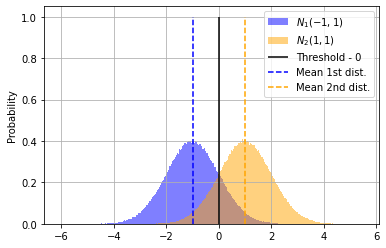

In [14]:
mu1, sigma1 = -1, 1
s1 = np.random.RandomState(20).normal(mu1, sigma1, 1000000)

mu2, sigma2 = 1, 1
s2 = np.random.RandomState(20).normal(mu2, sigma2, 1000000)

plt.hist(s1, density=True, bins=500, alpha=0.5, label='$N_1(-1,1)$', color='blue')  # `density=False` would make counts
plt.hist(s2, density=True, bins=500, alpha=0.5, label='$N_2(1,1)$', color='orange')  # `density=False` would make counts
plt.vlines(x=0, ymax=1, ymin=0, label='Threshold - 0')
plt.vlines(x=-1, ymax=1, ymin=0, linestyles= '--', label='Mean 1st dist.', color='blue')
plt.vlines(x=1,ymax=1,ymin=0, linestyles= '--', label='Mean 2nd dist.', color='orange')
plt.ylabel('Probability')
plt.legend()
plt.grid()

In [15]:
print('Probability $N_1(-1,1)$ is FP: ', 0.136 + 0.021 + 0.001)
print('Probability $N_2(1,1)$ is FN: ', 0.136 + 0.021 + 0.001)

Probability $N_1(-1,1)$ is FP:  0.158
Probability $N_2(1,1)$ is FN:  0.158


# Task 10: Monte Carlo sampling

In [16]:
N = 100000
sample_size = 10
s1_all = 0
for i in range(1,N):
    s1 = np.sum(np.random.RandomState(i).normal(mu1, sigma1, sample_size) > 0)
    s1_all = s1_all + s1
    p_fp = s1_all/(i*sample_size)
    if i%int(N/10) == 0:
        print('Probability of FP: %.4f' %(p_fp))

Probability of FP: 0.1572
Probability of FP: 0.1573
Probability of FP: 0.1574
Probability of FP: 0.1581
Probability of FP: 0.1580
Probability of FP: 0.1580
Probability of FP: 0.1580
Probability of FP: 0.1582
Probability of FP: 0.1585


In [17]:
N = 100000
sample_size = 10
s2_all = 0
for i in range(1,N):
    s2 = np.sum(np.random.RandomState(i).normal(mu2, sigma2, sample_size) < 0)
    s2_all = s2_all + s2
    p_fn = s2_all/(i*sample_size)
    if i%int(N/10) == 0:
        print('Probability of FN: %.4f' %(p_fn))

Probability of FN: 0.1579
Probability of FN: 0.1574
Probability of FN: 0.1581
Probability of FN: 0.1583
Probability of FN: 0.1587
Probability of FN: 0.1587
Probability of FN: 0.1586
Probability of FN: 0.1587
Probability of FN: 0.1588
